# BL40A2030 Wireless Communication Networks

## Week 2 - Assignment

### Author: Jaime Arturo Alvarez Orgaz

### Part I: Theory (40%)

**1. Explain with your own words what is a random variable and a random process.**

**2. Explain with your own words and give an example of the following kind of random processes:**

- (a) Memoryless
- (b) Markov
- (c) History-dependent

### Part II: Jupyter NB experiments (60%)

**The LUT restaurant works from 9 to 14. Based on the data, there were identified three different periods in relation to arrival of people to have lunch. Answer the following 3 questions.** 

*Hint:* Careful with the time scales given in the question and the one implemented in the tutorial.

**3. The arrivals follow a Poisson process with different arrival rates (see below). Simulate it, plot the historgram from the simulated results and compare with the analytical formulation. These are the parameters.**

- (a) For two hours between 9 and 11, the arrival rate is 10 students per 10 minutes.
- (b) For two hours between 11 and 13, the arrival rate is 30 students per 10 minutes.
- (c) For two hours between 13 and 15, the arrival rate is 20 students per 10 minutes.

**NOTE: Compute using rates in students per minute.**

**4. Using the code from the tutorial, simulate these three scenarios (one scenario per cell, do not combine the three scenarios in the same code). In this case, the restaurant put more works so the service rate varies as follows.**

- (a) For two hours between 9 and 11, the arrival rate is 10 students per 10 minutes. Service rate is 10 students per 10 minutes.
- (b) For two hours between 11 and 13, the arrival rate is 30 students per 10 minutes. Service rate is 35 students per 10 minutes.
- (c) For two hours between 13 and 15, the arrival rate is 20 students per 10 minutes. Serice rate is 19 students per 10 minutes.

**NOTE 1: Compute using rates in students per hour as input of the code.**

**NOTE 2: Simulation time is 2 hours.**

**NOTE 3: The analytical formulation only works when the queue is stable, i.e. arrival rates lower than service rates**

**5. Discussions about the results.**
- What is the impact of a simulation time of 2 hours?
- In the simulations, the 3 periods were also considered independent, i.e. the initial states of the queues were always considered 0. What is the impact of this assumption? (No need to simulate, just arguments)
- Would be this a sound model? Why?

**Challenge (not to be graded). Simulate a more realistic queue system considering that the three periods are sequencial and that the last period only ends after the last service is complete. When the restaurant is closed?**

**1**

Random variable: Function that generates random numbers for an experiment. Those numbers are usually in between a min and a max value.

Random process: A random process is a random variable but it depends on a random experiment and time. It changes with time and is controlled by some law.

**2**

Memoryless: In the context of a random process, memoryless means that the future is only affected by the current present.

Markov: Markov process is a process which the only variable that affect the probability of an event is the one that has happened inmediately before.
    
History-dependent: History-dependent means that the the past states are relevant to the future of the process. 

In [3]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
#style.use('seaborn-paper')
#style.use('fivethirtyeight')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**3a**

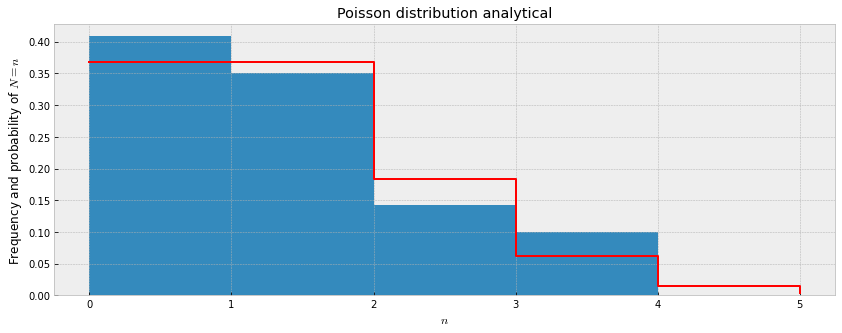

In [8]:
### Drawing a histogram (empirical distribution)
mean=1
samples_mean2 = np.random.poisson(mean, 120) # this is the simulation. Mean is lambda and the other number is how many trials
n_bins2 = np.max(samples_mean2) # set the number of bins in the histogram based on the highest value in the outcome
##

#Analytical formula for Poisson
x = np.arange(0, ss.poisson.ppf(0.9999, mean)) # set the range from 0 to the 99.99% of probability of outcome
analytical = ss.poisson.pmf(x, mean) # creating a array with the values; check documentation and examples

plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2, density=True)
plt.step(analytical,'r', where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency and probability of $N = n$')
plt.title('Poisson distribution analytical')
plt.show() 

**3b**

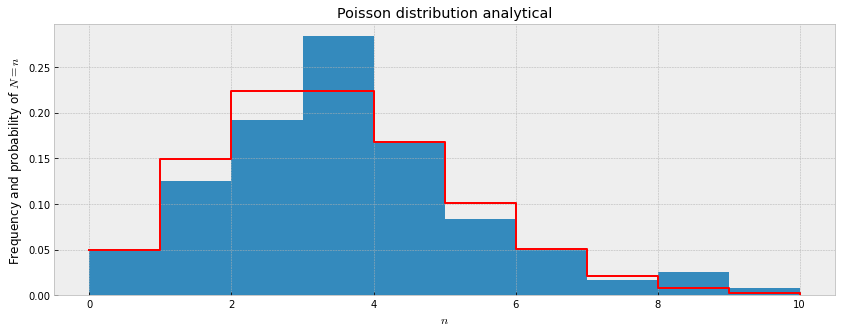

In [9]:
### Drawing a histogram (empirical distribution)
mean=3
samples_mean2 = np.random.poisson(mean, 120) # this is the simulation. Mean is lambda and the other number is how many trials
n_bins2 = np.max(samples_mean2) # set the number of bins in the histogram based on the highest value in the outcome
##

#Analytical formula for Poisson
x = np.arange(0, ss.poisson.ppf(0.9999, mean)) # set the range from 0 to the 99.99% of probability of outcome
analytical = ss.poisson.pmf(x, mean) # creating a array with the values; check documentation and examples

plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2, density=True)
plt.step(analytical,'r', where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency and probability of $N = n$')
plt.title('Poisson distribution analytical')
plt.show() 

**3c**

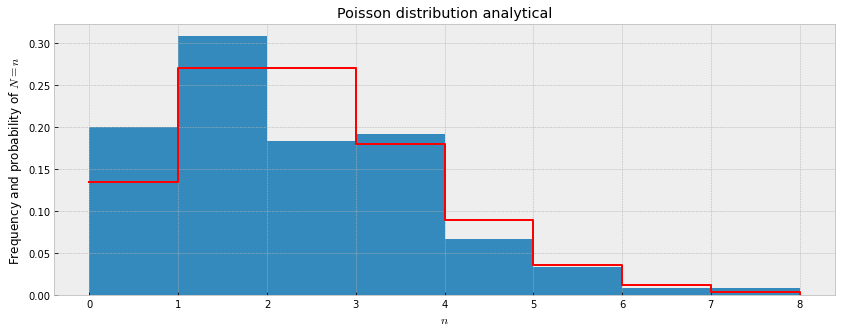

In [10]:
### Drawing a histogram (empirical distribution)
mean=2
samples_mean2 = np.random.poisson(mean, 120) # this is the simulation. Mean is lambda and the other number is how many trials
n_bins2 = np.max(samples_mean2) # set the number of bins in the histogram based on the highest value in the outcome
##

#Analytical formula for Poisson
x = np.arange(0, ss.poisson.ppf(0.9999, mean)) # set the range from 0 to the 99.99% of probability of outcome
analytical = ss.poisson.pmf(x, mean) # creating a array with the values; check documentation and examples

plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2, density=True)
plt.step(analytical,'r', where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency and probability of $N = n$')
plt.title('Poisson distribution analytical')
plt.show() 

**4a**

In [13]:
#Code adapted from: https://github.com/sarthak0120/M-M-1-Queue-Simulation
#New libraries needed
import queue #https://docs.python.org/3/library/queue.html
import copy 

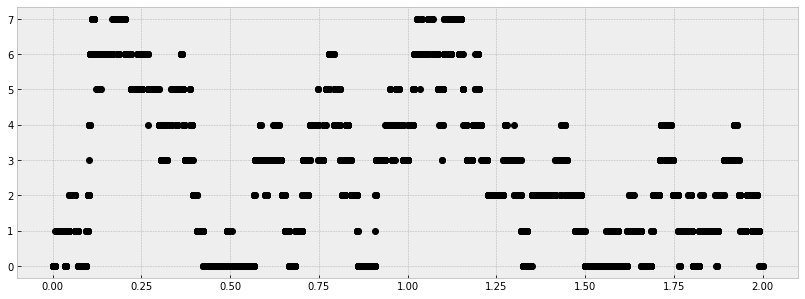

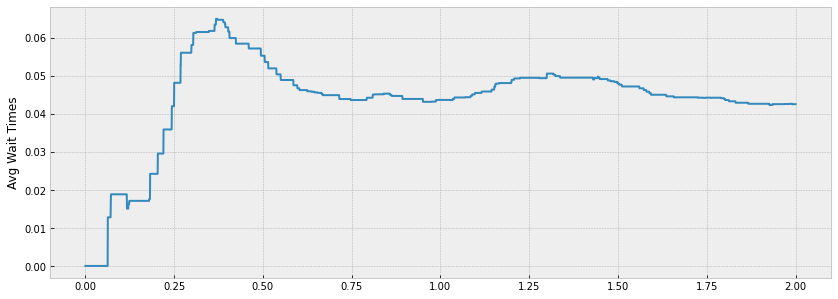

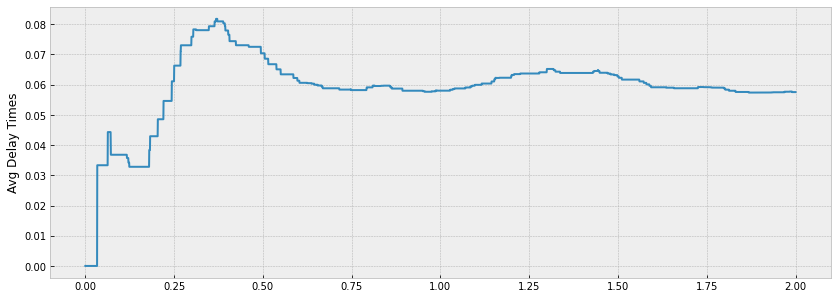

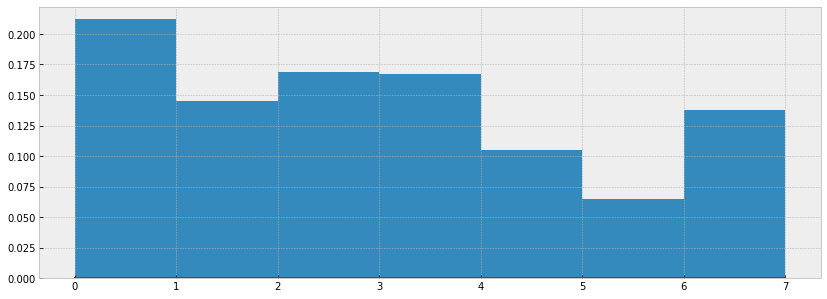

Idle ratio: 0.07736111111111112
Empty queue probability: 0.0


In [18]:
# Input Parameters -- Long one
total_time = 2 #hour
IAT_rate = 60 #elements arriving/hour
ST_rate = 60  #elements served/hour
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
#QWT = 1/((1-rho)*ST_rate) - 1/ST_rate
#WT = 1/((1-rho)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
#plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
#plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = (1-rho)*rho**x
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
#print('Wait time in queue',QWT)
#print('Delay time in system',WT)

**4b**

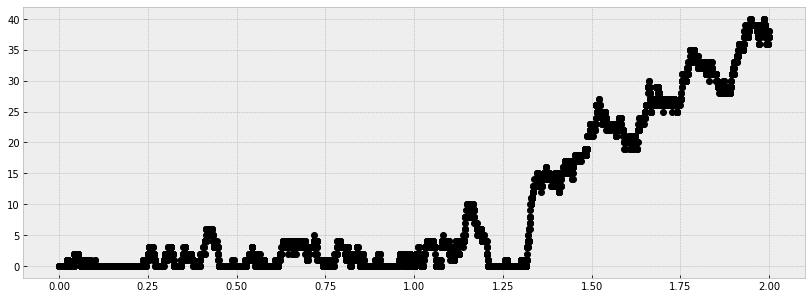

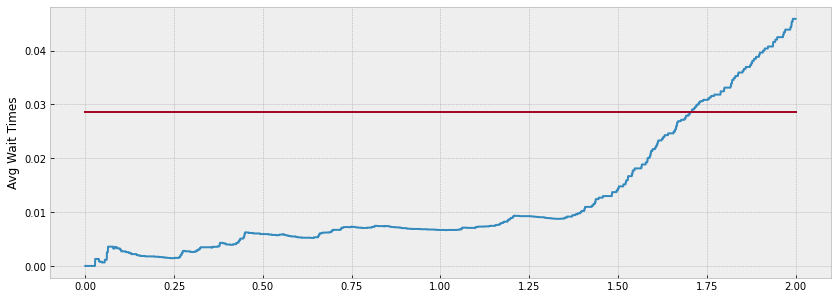

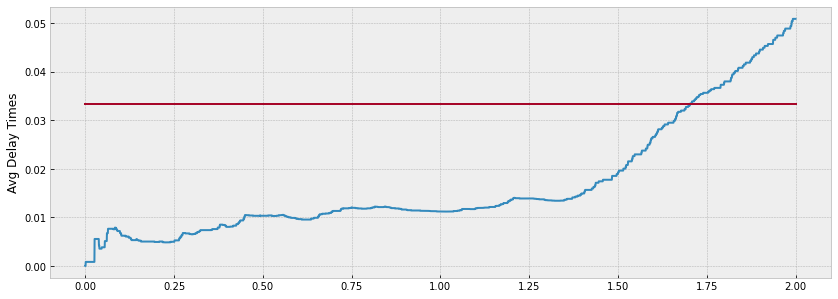

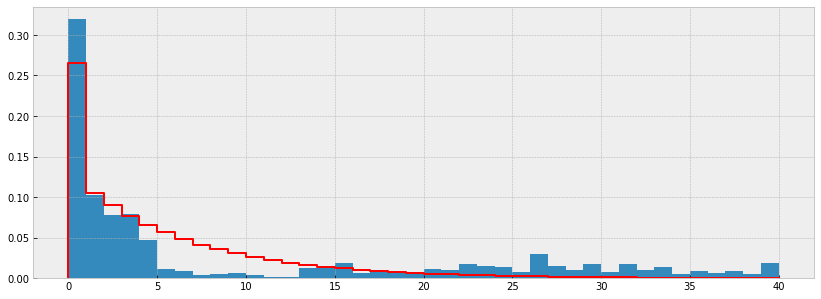

Idle ratio: 0.1736111111111111
Empty queue probability: 0.1428571428571429
Wait time in queue 0.028571428571428557
Delay time in system 0.03333333333333332


In [19]:
# Input Parameters -- Long one
total_time = 2 #hours
IAT_rate = 180 #elements arriving/hour
ST_rate = 210  #elements served/hour
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
QWT = 1/((1-rho)*ST_rate) - 1/ST_rate
WT = 1/((1-rho)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = (1-rho)*rho**x
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
print('Wait time in queue',QWT)
print('Delay time in system',WT)

**4c**

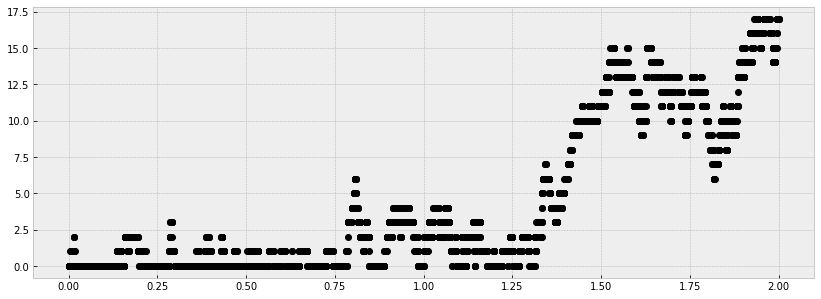

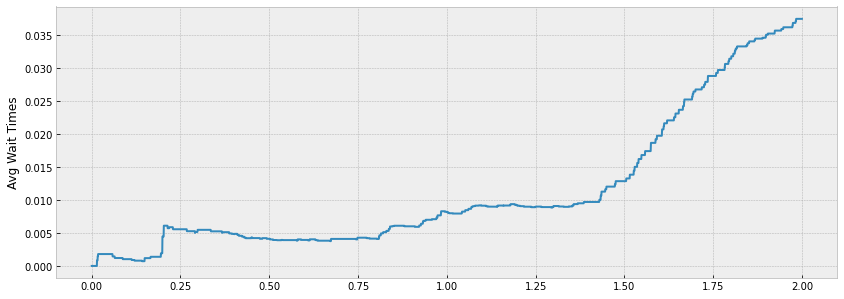

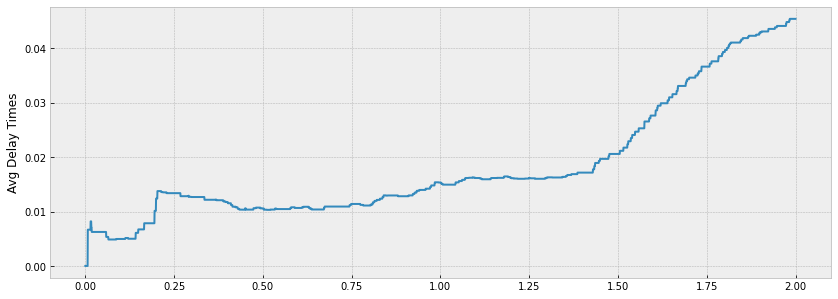

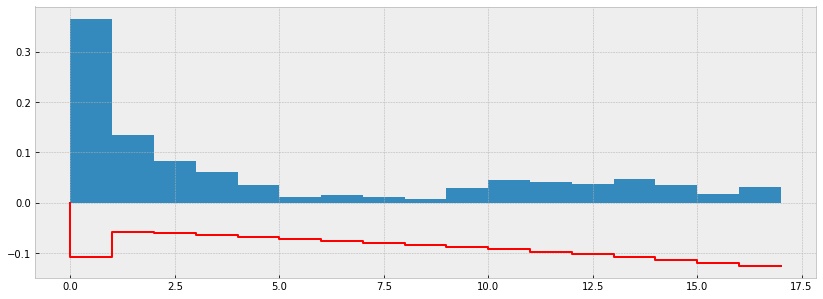

Idle ratio: 0.20902777777777778
Empty queue probability: -0.05263157894736836


In [20]:
# Input Parameters -- Long one
total_time = 2 #hour
IAT_rate = 120 #elements arriving/hour
ST_rate = 114  #elements served/hour
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
#QWT = 1/((1-rho)*ST_rate) - 1/ST_rate
#WT = 1/((1-rho)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
#plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
#plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = (1-rho)*rho**x
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
#print('Wait time in queue',QWT)
#print('Delay time in system',WT)

**5.1**

The impact of only having a 2 hour running time means that the results we obtain aren't as varied and rich as if be had a bigger running time like 100 or 500 hours.

**5.2**

If we start with the queue already filled and the elements arriving are more than the elements serving, this will mean a bigger delay and wait time. On the other hand, if the queue isn't really big and the elements serving are far more than the elements arriving, the impact wouldn't be as noticiable.

**5.3**

This is definitely not a sound model. It can not be applied to real life uses like supermarket or bank queue. Only in one of the models, the probability of having the queue empty is above 0. This means that in all the cases that the arrival rate is equal or above the serving rate, the queue will never be empty so it will have an impact in the delay and waiting time for the next batch of people to arrive the queue.